# Zero2Basic - Hash Functions
This post is intended to provide a quick introduction to hash functions and to discuss some practical applications of hashes in data mining and machine learning. As with my other Zero2Basic posts my aim is to provide a basic level of understanding of the concept and to demonstrate a real world use case.

Want to cut to the chase?<br> 
Heres how to implement a variety of common hash funcitons using [hashlib](https://docs.python.org/3/library/hashlib.html) in Python.

In [141]:
import hashlib

txt = "My first hash"
hash = hashlib.sha1() # avaliable hashes: md5(), sha1(), sha224(), sha256(), sha384(), and sha512()
hash.update(txt.encode()) # encode to product utf-8 bytes object
print(f'"{txt}"\t>sha1>\t"{hash.hexdigest()}"')

"My first hash"	>sha1>	"f367b9519a72e7c2c5452ed73705a66cc78fee6b"


Recently I was working on a text data-mining task at work. For context, the client had been keeping an unstructured and unmastered record of around 3 million contacts including customers, leads, contacts, etc. To make matters worse they were adding some 5000+ entries to this list per day. Whilst they are in the process of investing in a master data management solution, this is not going to be implemented for some time and will do little to resolve the 20 year backlog of noisy data and that is critical for continued business operation.<br><br>

Ok so this isnt my irst rodeo. Let's face it messy data is everywhere in business. Most people working as data engineers, analysts, scientists and machine learners are likely familar with this problem and fortunately there is an arsenal tools at our disposal. Including: text manipulation and standardisation [e.g. cleanco, regex](); clustering ["post on clustering"](); and machine learning techniques[entitiy resolution, record linkage and de-duplication]().I need to write a post on those [duke, dedupe, zentity]().<br><br>
For my scenario I needed a a solution that could: i) create a unique identifier of each record, and ii) be used to efficiently indicate wether or not any new records were duplicates of exisiting ones. Cue a hash function.

### So what is a hash function?
*"A hash function is a deterministic function that maps inputs of arbitrary sizes to outputs of a fixed size." [Wiki](https://en.wikipedia.org/wiki/Hash_function)*<br> 
Some important properties of Hash functions are:
 - They are quick to compute.
 - They are determistic, i.e. they are non-random and repeatable. 
 - Even if the inputs are similar such as "ABC" and "ACB", the outputs should be uncorrelated.
 - It is practically infeasible to predict the output of a hash function, or to [reverse](https://crypto.stackexchange.com/questions/45377/why-cant-we-reverse-hashes) a hash value to its original value.
 - They can map an infinite number of inputs, and of any length, to outputs of fixed length.
 - Therefore a hash function generates a finite number of outputs. Longer hash functions having more possible outputs. 
 
### What are they used for?
Common hash function [applications](https://en.wikipedia.org/wiki/Hash_function#Uses) include cryptography and creating hash-tables for indexing and searching data.<br><br>
For instance, when performing a query on a database for the string "Apple Computer", a hash may be used to create a hash-table that can be used to quickly indicate the records that contain the substring "A" or "Apple" or "Computer". Boolean operations are computationally cheap and therefore hash-tables greatly reduce the search space to a subset list of candidate records. Avoiding the need to evaluate every single record in the database. A [hash-table](https://en.wikipedia.org/wiki/Hash_function#Hash_tables) is simply a table of boolean values (True or False) for wether or not a string contains a substring or not - or rather the hash of the string or substring. <br><br>
In cryptogrpahy, a hash function may be used to convert a bank account holders raw password (e.g. "Mittens1998") to a hash value. The banks website and mobile applications each use the same hash function and therefore the bank only needs to keep a record of the password's hash value, never revealing the users password to anyone not even the bank. The login system applies the same hash function to every password entered and so even if someone were to leak the hashed values of the user passwords, these would be converted to another hash value if they were used to login.<br><br>
Subsequently the Hash functions that are generally suitable for application to information retrieval, text mining and data indexing are  quite different [crytogrpahic hash functions](https://en.wikipedia.org/wiki/Cryptographic_hash_function).
<br><br>
So lets begin.

As above we'll use the [sha-1](https://en.wikipedia.org/wiki/SHA-1) hash function.

 - sha-1 hash values are 160 binary bits in length.
 - The hash values are typically written as a 40 digit hexidecimal string.
 - A single hexidecimal character can only represent 16 different values 0-9 and A-F. E.g. the hex digits "0F" represents two sets of 4 binary bits "0000 1111" (see the [wiki on hexidecimals]([hexidecimal](https://en.wikipedia.org/wiki/Hexadecimal))).
 - Therefore there are a total $16^{40} = 2^{160}$ sha-1 hash values in existance. Or
 
*"one quindecillion, four hundred sixty-one quattuordecillion, five hundred one tredecillion, six hundred thirty-seven duodecillion, three hundred thirty undecillion, nine hundred two decillion, nine hundred eighteen nonillion, two hundred three octillion, six hundred eighty-four septillion, eight hundred thirty-two sextillion, seven hundred sixteen quintillion, two hundred eighty-three quadrillion, nineteen trillion, six hundred fifty-five billion, nine hundred thirty-two million, five hundred forty-two thousand, nine hundred seventy-six"*[rbn](http://www.mathcats.com/explore/reallybignumbers.html)

Thats a lot! Surely we would never find a duplicate? Would we? More on that in a minute so lets also wrap the hash into a function that allows us to slice the hash to a given length. 

In [1]:
import hashlib

def hash_of_length(txt, length=40):
    """Function to sha-256 hash strings to a certain length"""
    hash = hashlib.sha1()
    hash.update(txt.encode())
    return hash.hexdigest()[:length]

In [2]:
# define some strings to test
some_people = ['Bob Iger','bob iger','bob seager','bob dole','bod geldoff','bob marley','bob ross','bob dylan','alan jackson']
hashes = list()

# hash the strings
for name in some_people:
    hash_ = hash_of_length(name)
    hashes.append(hash_)
    print(f'"{name}"\t>sha1>\t"{hash_}"')

"Bob Iger"	>sha1>	"175aa5c4ad84e07322d1e6d569c76af0fa1f40e1"
"bob iger"	>sha1>	"46132fd9df433a3b6171511c4f27efcae283a1a0"
"bob seager"	>sha1>	"137b17bdfdd8e0ec7194b8213734ea1fcaf33a2b"
"bob dole"	>sha1>	"92fbeb33968659b487521261436f590f2dbf16bc"
"bod geldoff"	>sha1>	"05a3abd740c56c88c2042000b57894f71b0fef28"
"bob marley"	>sha1>	"7d8e97df8cd7d090da958fe7779924785b0baa06"
"bob ross"	>sha1>	"4cf9d0f31cd664b4174ad5699d9700b1e38da01b"
"bob dylan"	>sha1>	"bc85844ebeb428aa23e8d822d800df18e32fff13"
"alan jackson"	>sha1>	"355dce7e8e09cb6dc07d45b77c4c36942eca140e"


Ok we have sucessfully hashed our initial list of name strings.<br>
Some time passes and we receive some new names in our list. Lets hash these and examine all the names in a table. 

In [3]:
some_more_people = ['Bob Iger','bob iger ','Bob Dylan']

# hash the strings
for name in some_more_people:
    hash_ = hash_of_length(name)
    hashes.append(hash_)

In [5]:
import pandas as pd

# create a df of the strings and hashes
df = pd.DataFrame({'name':some_people+some_more_people,'hash':hashes})

# add an id field for unique hash values
df['id'] = pd.factorize(df['hash'])[0]
df.sort_values(by='id')

,name,hash,id
0,Bob Iger,175aa5c4ad84e07322d1e6d569c76af0fa1f40e1,0
9,Bob Iger,175aa5c4ad84e07322d1e6d569c76af0fa1f40e1,0
1,bob iger,46132fd9df433a3b6171511c4f27efcae283a1a0,1
2,bob seager,137b17bdfdd8e0ec7194b8213734ea1fcaf33a2b,2
3,bob dole,92fbeb33968659b487521261436f590f2dbf16bc,3
4,bod geldoff,05a3abd740c56c88c2042000b57894f71b0fef28,4
5,bob marley,7d8e97df8cd7d090da958fe7779924785b0baa06,5
6,bob ross,4cf9d0f31cd664b4174ad5699d9700b1e38da01b,6
7,bob dylan,bc85844ebeb428aa23e8d822d800df18e32fff13,7
8,alan jackson,355dce7e8e09cb6dc07d45b77c4c36942eca140e,8


We can see that some idenitical names were found for "bob iger" and "Bob Iger". Maybe this a purchase list of rights to Marvel comics?<br>

We could improve our system by applying some typical text standardization steps such as:
 - make each string lowercase.
 - removing any trailing or double white spaces.
 - folding any special characters to ASCII characters.
 
In addition, if this were a very large list we might look to split each the strings to first and last name and hash those values too. This would allow us to efficiently locate all of the records with first name "bob" or with the last name "ross" etc. Then we would have a pretty good system to detect duplicates and to search a large number of records.

But wait a minute, arn't we adding overhead and computation time by converting our raw strings to in many cases longer 160 bit / 40 character strings, why not just compare the raw strings? Well often we may need to obsucre the data when sharing or storing for privacy reasons. But sure, many of our names are indeed less than 40 characters long so lets slice our hashes to the first 10 characters using the function we created earlier.

In [48]:
test = 'Bob Marley and The Wailers'
hash_of_length(test,length=10)

'b0c470d2c2'

Not so fast though. Remember our hash function has a very large but finite number of outputs. In fact the probability of a hash collision follows an approximate exponential function and so shorter hash digests can quickly lead to hash collisions. The [Birthday Problem or Paradox](https://en.wikipedia.org/wiki/Birthday_problem) concerns "the probability of any two people in a room having the same birthday?" and for hashes this translates to "that probability of any two hashes shairng the same value given hashes of length $n$". There are stories of companies using hashes as unique ID's and falling foul of the birthday paradox such as [here](https://www.reddit.com/r/programming/comments/35uh62/dont_play_with_the_odds_how_the_birthday_paradox/) and [here](https://pthree.org/2014/03/06/the-reality-of-sha1/).

We can use the Birthday Paradox to approximate the probability of a hash collision in ${K}$ values given $n$-length hash values.

In [106]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sha1_birthday_paradox(probability=0.5,hash_length=10,print_out=True):
    d = 16**hash_length # 
    collision = np.sqrt(2*d*np.log(1/(1-probability))) # K
    if print_out is True:
        print(f'There is {probability*100} % chance of a hash collision using {int(hash_length)} hex digits of SHA1 hash values on a list with {int(collision)} values')
    return collision
    
for hash_length in range(2,12):
    sha1_birthday_paradox(hash_length=hash_length)

There is 50.0 % chance of a hash collision using 2 hex digits of SHA1 hash values on a list with 18 values
There is 50.0 % chance of a hash collision using 3 hex digits of SHA1 hash values on a list with 75 values
There is 50.0 % chance of a hash collision using 4 hex digits of SHA1 hash values on a list with 301 values
There is 50.0 % chance of a hash collision using 5 hex digits of SHA1 hash values on a list with 1205 values
There is 50.0 % chance of a hash collision using 6 hex digits of SHA1 hash values on a list with 4822 values
There is 50.0 % chance of a hash collision using 7 hex digits of SHA1 hash values on a list with 19290 values
There is 50.0 % chance of a hash collision using 8 hex digits of SHA1 hash values on a list with 77162 values
There is 50.0 % chance of a hash collision using 9 hex digits of SHA1 hash values on a list with 308650 values
There is 50.0 % chance of a hash collision using 10 hex digits of SHA1 hash values on a list with 1234603 values
There is 50.0 % 

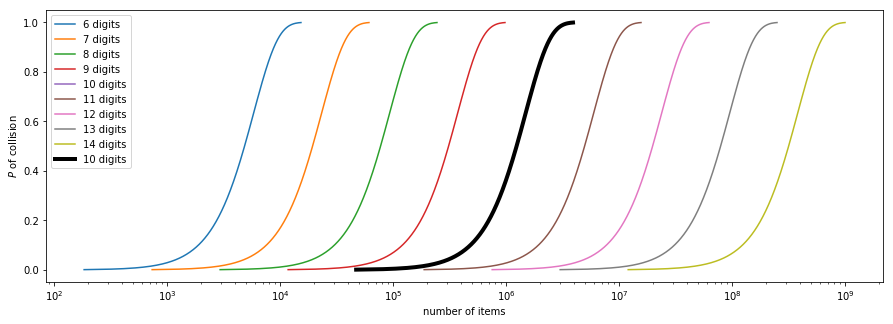

In [116]:
fig,axs = plt.subplots(figsize=(15,5))
for hash_length in range(6,15):
    
    axs.plot([sha1_birthday_paradox(probability=p,hash_length=hash_length,print_out=False) for p in np.arange(0.001,1.000,0.001)],
             np.arange(0.001,1.000,0.001),
             label=f'{hash_length} digits')
    
axs.plot([sha1_birthday_paradox(probability=p,hash_length=10,print_out=False) for p in np.arange(0.001,1.000,0.001)],
             np.arange(0.001,1.000,0.001),color='black',lw=4,
             label='10 digits')
    
axs.set_xlabel('number of items')
axs.set_ylabel('$P$ of collision')
axs.set_xscale('log')
axs.legend();

As illustrated the likelihood of a hash collision increases significantly for shorter hash values. For instance, using A 10 hexidecimal hash digits is almost certain to collide with another hash on lists with 1 to 1.5 million values, thats equivalent to the annual [probability of a person being struck by lightning in the US](https://www.regulation.org.uk/library/2017-Spiegelhalter-Risk_and_Uncertainty_Communication.pdf).

### Public Service Announcement on the internal python **hash()**
Whilst this worked in Python 2 this **does not work** in Python 3 as the hash() function is randomly [seeded](https://stackoverflow.com/a/42089311/4538066) on each invocation.

In [109]:
[hash(name) for name in some_people]

[7773108651347944725,
 8006110316508352370,
 -4711472200811115197,
 123284575197524578,
 -8391844908185670689,
 1405988622133364812,
 282785915860111406,
 -3606204635308506520,
 1427013989549703842]

In [112]:
# and after restarting the kernel
[hash(name) for name in some_people]

[7773108651347944725,
 8006110316508352370,
 -4711472200811115197,
 123284575197524578,
 -8391844908185670689,
 1405988622133364812,
 282785915860111406,
 -3606204635308506520,
 1427013989549703842]

# Related links
 - [SO - Chance of a duplicate hash when using first 8 characters of SHA1](https://stackoverflow.com/questions/30561096/chance-of-a-duplicate-hash-when-using-first-8-characters-of-sha1)
 - [SO - Obfuscating text](https://stackoverflow.com/questions/8554286/obfuscating-an-id)